In [40]:
import numpy as np
import tensorflow as tf
from glob import glob
import IPython
import librosa
import matplotlib.pyplot as plt
import torchaudio

# Generate spectrograms

In [2]:
hop=256               #hop size (window size = 4*hop)
sr=16000             #sampling rate
n_mels= hop
n_stft= (513-1)*2
min_level_db=-100     #reference values to normalize data
ref_level_db=20


shape=128           #length of time axis of split specrograms         
spec_split=1

In [23]:
import torch
from torchaudio.transforms import Spectrogram

torch.set_default_tensor_type('torch.FloatTensor')

specobj = Spectrogram(n_fft=4*hop, win_length=4*hop, hop_length=hop, pad=0, power=2, normalized=False)
specfunc = specobj.forward

def specfunc(waveform):
  specgram = specfunc(waveform)
  return specgram

def normalize(S):
  return np.clip((((S - min_level_db) / -min_level_db)*2.)-1., -1, 1)

def prep(wv, hop=192):
  S = np.array(torch.squeeze(specfunc(torch.Tensor(wv).view(1,-1))).detach().cpu())
  S = librosa.power_to_db(S)-ref_level_db
  return normalize(S)


In [7]:
#Generate spectrograms from waveform array
def tospec(data):
  spectro = []
  for awv in data:
    spec = prep(awv)
    spectro.append(spec)
  return np.array(spectro, dtype=np.float32)
    

#Waveform array from path of folder containing wav files
def audio_array(path):
  ls = glob(f'{path}/*.wav')
  adata = []
  for i in range(len(ls)):
    x, sr = tf.audio.decode_wav(tf.io.read_file(ls[i]), 1)
    x = np.array(x, dtype=np.float32)

    time = 1
    length = len(x)/sr

    while time < length:
      adata.append(x[(time-1)*sr:time*sr])
      time += 1

  return np.array(adata)

In [9]:
audio_directory = "./Dataset/wav/male"
array_file = './Dataset/array/male'

#get waveform array from folder containing wav files
awv = audio_array(audio_directory)

#get spectrogram array
aspec = tospec(awv)

print(aspec.shape)

np.save(array_file,aspec)

(2489, 513, 63)


# Compare results

In [ ]:
from utils import print_stats, plot_waveform, plot_specgram_from_wave, plot_specgram
import torchaudio

SAMPLE_WAV_SPEECH_PATH = "./Dataset/wav/female/arctic_a0001.wav"


waveform, sample_rate = torchaudio.load(SAMPLE_WAV_SPEECH_PATH)
print(np.shape(waveform))
plt.clf()
print_stats(waveform, sample_rate=sample_rate)
plot_waveform(waveform, sample_rate)
plot_specgram_from_wave(waveform, sample_rate)

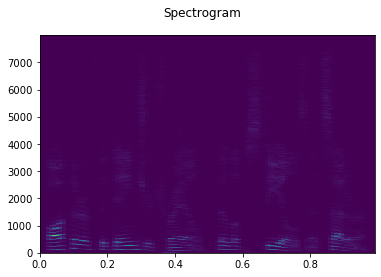

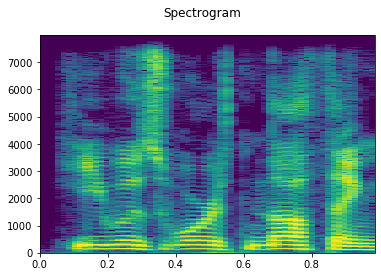

In [41]:
import librosa
import soundfile as sf


def to_audio(x):
  audio_signal = librosa.core.spectrum.griffinlim(abs_spectrogram)
  return audio_signal

""" Spectrogram transformation without normalisation """
sig, fs = librosa.core.load("./Dataset/wav/male/arctic_a0001.wav", sr=16000)
abs_spectrogram = np.abs(librosa.core.spectrum.stft(sig))
plot_specgram(abs_spectrogram, 16000)
audio_signal = librosa.core.spectrum.griffinlim(abs_spectrogram)
sf.write('test_normal.wav', data=audio_signal, samplerate=16000)

audio_signal = awv[0]
sf.write('test_sec_cut.wav', data=audio_signal, samplerate=16000)



plot_specgram(aspec[0], sr)
audio_signal = librosa.core.spectrum.griffinlim(aspec[0])
sf.write('test_normalised.wav', data=audio_signal, samplerate=16000)